- Predict the News Sentiment
- Problem Statement
- Social Media has been taking up everything on the Internet. People getting the latest news, useful resources, life partner and what not. In a world where Social media plays a big role in giving news, we must also know that news which affects our sentiments are going to get spread like a wildfire.  Here is a dataset which has news items based on four topics, economy, Obama, Microsoft, and Palestine. Based on the Headline and the title, and according to the date given and the Social media platforms, you have to predict how it has affected the human sentiment scores. You have to predict the column “SentimentTitle” and “SentimentHeadline”.
- Column Description
- Sl. No.	Column Label	Column Description
1.	IDLink:	Unique ID Link for each news
2.	Title:	Title of the News
3.	Headline:	The headline of the News
4.	Source:	News Source
5.	Topic:	The topic of the News
6.	PublishDate:	Date and Time when the news was published
7.	Facebook:	The final value of the news items' popularity according to the social media source Facebook 
8.	Google+:	The final value of the news items' popularity according to the social media source Google+ 
9.	LinkedIn:	The final value of the news items' popularity according to the social media source LinkedIn 
10.	SentimentTitle:	Sentiment score of the title, Higher the score, better is the impact or +ve sentiment and vice-versa. (Target Variable 1)
11.	SentimentHeadline:	 Sentiment score of the text in the news items' headline. Higher the score, better is the impact or +ve sentiment. (Target Variable 2)
- In some cases, you’ll see –ve sentiment for the title but +ve sentiment in the headline, that’s because after reading the title some people got upset, but after they read the complete headline, they felt better. Social media popularity, -ve or low-value means, the news was not so engaging and interesting and didn’t reach out to many people in that particular platform. Higher the value better is the outreach.
- Submission Format
- You have to predict the column “SentimentTitle” and “SentimentHeadline” and please submit in the format given in the “sample_submissions.csv” file.
1. IDLink,SentimentTitle,SentimentHeadline
2. tFrqIR6Chj,0.068518519,-0.039304967
3. DVAaGErjlF,0,-0.013312701
4. OT9UIZm5M2,0.036084392,0.037820653
5. lflGp3q2Fj,-0.073610645,-0.417361111
6. zDYG0SoovZ,0.047111148,-0.213200716
- Evaluation Metrics
- Scores are evaluated based on the weighted sum of the mean_absolute_error metric on both the predicted values. 
- Leaderboard score = max⁡(0,(1-0.4*MAE_title+0.6*MAE_headline ))

In [227]:
# loading the required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.externals import joblib 
import nltk
# nltk.download('stopwords')
print('Downloaded Stopwords')
from nltk.corpus import stopwords
import re
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from sklearn.feature_extraction.text import HashingVectorizer

Downloaded Stopwords


In [2]:
# set the working directory
os.chdir('C:/Users/admin/Documents/Python Files')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [3]:
# Importing data
train = pd.read_csv('ffa982469f0d11e9/dataset/train_file.csv')
test = pd.read_csv('ffa982469f0d11e9/dataset/test_file.csv')
submission = pd.read_csv('ffa982469f0d11e9/dataset/sample_submission.csv')

In [16]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [154]:
train.loc[0,'Headline']

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [6]:
test.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [7]:
submission.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,0.068519,-0.039305
1,DVAaGErjlF,0.000000,-0.013313
2,OT9UIZm5M2,0.036084,0.037821
3,lflGp3q2Fj,-0.073611,-0.417361
4,zDYG0SoovZ,0.047111,-0.213201


In [4]:
# Let's see if there are any missing values
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,IDLink,0
1,Title,0
2,Headline,0
3,Source,175
4,Topic,0
5,PublishDate,0
6,Facebook,0
7,GooglePlus,0
8,LinkedIn,0
9,SentimentTitle,0


In [41]:
# Lets' see where are the missing values is Source variable
train[train['Source'].isna()]

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
6,lKg2pImhCl,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0,0,0,0.000000,-0.005906
56,ZOKue2cqfO,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0,0,0,0.000000,0.048546
111,JXfRvxs0R6,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,0,0,0,-0.243068,0.048546
350,A1YOXDsuOO,Human rights situation in Palestinian territor...,In a special meeting convened by the UN Human ...,NaN,palestine,2015-10-28 17:24:00,-1,-1,-1,-0.228299,-0.124931
409,fO2mYsUg5P,Japan Contributes $5.73M To UNRWA’s Food Assis...,"JERUSALEM, October 31, 2015 (WAFA) – The Japan...",NaN,palestine,2015-10-31 04:30:00,-1,-1,-1,0.166667,-0.042878
442,e07E6bxYOd,Erekat on Balfour: World Must End Decades of O...,"RAMALLAH, November 2, 2015 (WAFA) – Secretary-...",NaN,palestine,2015-11-02 04:29:00,-1,-1,-1,0.041667,0.054328
1284,sumN11pTYG,October Economy Watchers Survey:Expectations i...,The latest announced October Economy Watchers ...,NaN,economy,2015-11-10 20:15:00,0,0,0,0.000000,0.000000
1787,9cvdPFt2wz,Microsoft to Set Up Data Centres in Germany,Microsoft planned to work with Deutsche Teleko...,NaN,microsoft,2015-11-12 06:12:00,0,0,0,0.044194,0.031580
2101,RHr4FuNbW3,Economy slows to 2.3%,Hong Kong's economy slowed to 2.3% year-on-yea...,NaN,economy,2015-11-13 03:26:00,-1,-1,-1,0.000000,-0.181367
2462,JUdx2d40B7,PLO Erekat: Very Few Believe Two-State Solutio...,"RAMALLAH, November 15, 2015 (WAFA) – Secretary...",NaN,palestine,2015-11-15 03:29:00,-1,-1,-1,0.014494,0.046588


In [5]:
train.dropna(inplace=True)

## Graphical EDA - Data Visualization 

In [ ]:
# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


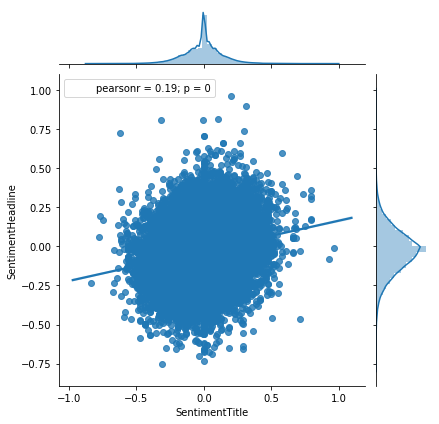

In [44]:
_ = sns.jointplot(x='SentimentTitle',y='SentimentHeadline',data=train,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


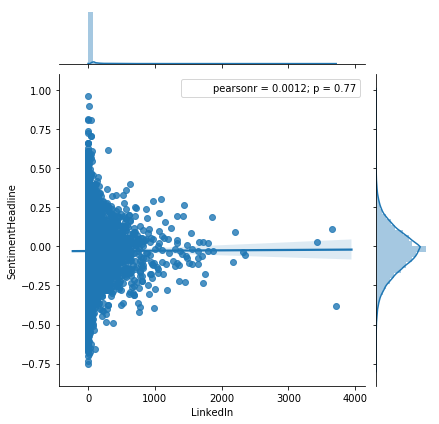

In [48]:
_ = sns.jointplot(x='LinkedIn',y='SentimentHeadline',data=train,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

# Correlation Heatmap Plot
- For 'Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline' variables

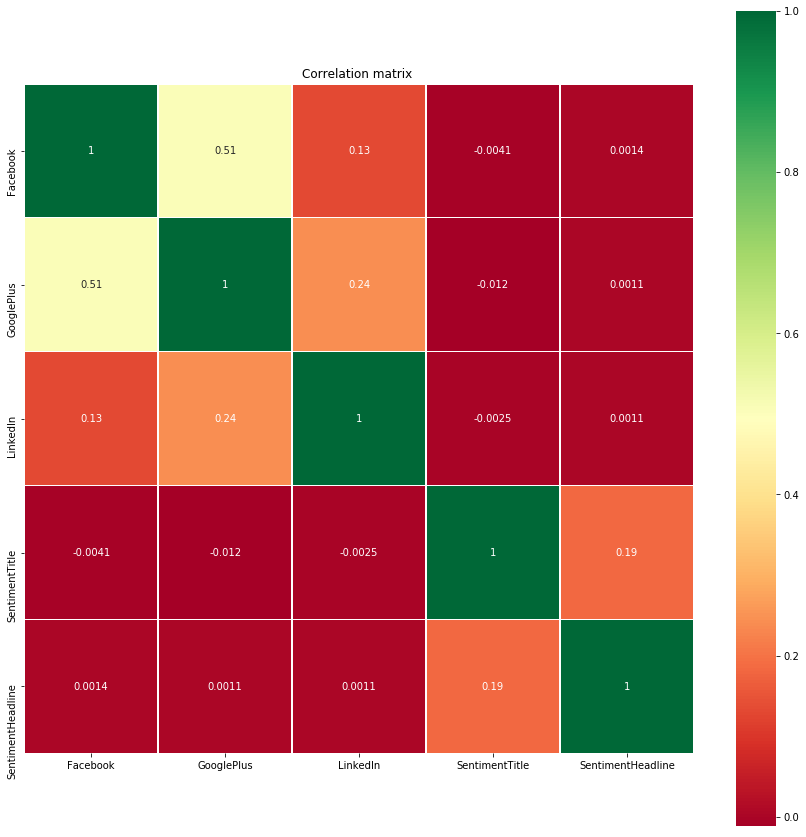

In [6]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(train[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

- As we can see from the above plot there is no correlation between 'SentimentTitle' and 'SentimentHeadline' therefore 'SentimentTitle' cannot be useful to predict 'SentimentHeadline'
- Also there is no correlation between independent variables and dependent variables therefore I will consider only 'Title' and 'Headline' to predict our dependent variables - 'SentimentTitle' and 'SentimentHeadline'

In [17]:
train.columns

Index(['Title', 'Headline', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn',
       'SentimentTitle', 'SentimentHeadline'],
      dtype='object')

In [18]:
train.shape

(55932, 8)

In [20]:
temp = pd.get_dummies(train['Topic'], prefix = 'Topic')
train = train.join(temp)

In [21]:
train.columns

Index(['Title', 'Headline', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn',
       'SentimentTitle', 'SentimentHeadline', 'Topic_economy',
       'Topic_microsoft', 'Topic_obama', 'Topic_palestine'],
      dtype='object')

In [22]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            55922, 55923, 55924, 55925, 55926, 55927, 55928, 55929, 55930,
            55931],
           dtype='int64', length=55932)

# Let's start building 

In [85]:
# create the nlp object using Spacy's English language class
nlp = English()

# Creating a function for custom tokenizer

In [208]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

# Here we have used TransformerMixin from sklearn.base to create custom transformer

In [209]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [210]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# Creating the Bag of Words model
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(1,2))
# X = bow_vector.fit_transform(train.loc[:,'Title']).toarray()

not used

In [229]:
# Using HashingVectorizer instead of bow model
# hashvectorizer = HashingVectorizer(token_pattern=spacy_tokenizer,non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2))

# joining 2 Columns - Title and Headline in both train and test dataset to make modelling easier

In [211]:
train['Title_and_Headline'] = train['Title'] +' '+ train['Headline']
test['Title_and_Headline'] = test['Title'] +' '+ test['Headline']

In [213]:
train.loc[0,'Title_and_Headline']

'Obama Lays Wreath at Arlington National Cemetery Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [214]:
test.loc[0,'Title_and_Headline']

'Sliding Economy: FG fights back with N3trn TSA funds With the 2016 budget now passed by the National Assembly and a N3trillion war chest, the government of President Muhammadu Buhari says'

# Separating labels and features

In [215]:
X_train = train.loc[:,'Title_and_Headline'].values
y_train = train.loc[:,['SentimentTitle','SentimentHeadline']].values
X_test = test.loc[:,'Title_and_Headline'].values

In [216]:
X_train.shape

(55757,)

In [217]:
y_train

array([[ 0.        , -0.05330018],
       [ 0.20833333, -0.15638581],
       [-0.42521003,  0.13975425],
       ...,
       [ 0.02574737,  0.11481983],
       [ 0.        , -0.02829582],
       [ 0.        ,  0.18444444]])

In [218]:
X_train

array(['Obama Lays Wreath at Arlington National Cemetery Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor',
       'A Look at the Health of the Chinese Economy Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.',
       "Nouriel Roubini: Global Economy Not Back to 2008 Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions",
       ...,
       "Think Trump's 45 Percent Tariffs Are Bad? Try Obama's 10000 ... While Trump wants to put large tariffs on imports from some of our major trading partners, President Obama is actively pushing to have far",
       'Microsoft finally releases giant Surface Microsoft’s business customers are finally beginning to take delivery of the giant, Windows 10-powered digital whiteboard. ',
       'Rays of sunshine

# Random forest OR Xgboost regressor
- models are used with class sklearn.multioutput.MultiOutputRegressor is Trained only on Title and Headline features. This is a simple strategy for extending regressors that do not natively support multi-target regression

In [219]:
# regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
#                                                           max_depth=None,
#                                                           random_state=0))
xgboost = MultiOutputRegressor(XGBRegressor())

In [234]:
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', xgboost)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x000001ABAC91A908>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
       ...le_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
           n_jobs=None))])

In [235]:
pred = pipe.predict(X_test)

In [236]:
pred

array([[-0.00749338, -0.03212702],
       [-0.00592595, -0.02450025],
       [-0.00945139, -0.03161961],
       ...,
       [-0.02112901, -0.04623163],
       [ 0.02161041,  0.03526619],
       [-0.00112689, -0.01647049]], dtype=float32)

# let's make a dataframe with predicted values - 'pred' 
- with index of test dataframe and columns as column names as 'SentimentTitle','SentimentHeadline' and convert that dataframe to .csv format

In [237]:
sample_submission = pd.DataFrame(data = pred,index = test['IDLink'],columns = ['SentimentTitle','SentimentHeadline'])
sample_submission.to_csv('v0.3.csv')

# let's see our dataframe

In [226]:
sample_submission

,SentimentTitle,SentimentHeadline
IDLink,,
tFrqIR6Chj,-0.007493,-0.032127
DVAaGErjlF,-0.005926,-0.024500
OT9UIZm5M2,-0.009451,-0.031620
lflGp3q2Fj,-0.002447,0.065494
zDYG0SoovZ,-0.005960,-0.032127
xwr9uOYgEj,-0.012102,-0.032127
X8BqN4I4xZ,-0.012217,-0.032127
ESXBINkNt4,-0.014618,-0.032127
uUjZusP8FU,-0.012102,-0.032127
